Epoch 1/5, Loss: 0.4174495807920175
Epoch 2/5, Loss: 0.24070355607668173
Epoch 3/5, Loss: 0.12319699624019108
Epoch 4/5, Loss: 0.09710689496773284
Epoch 5/5, Loss: 0.09120427878179274


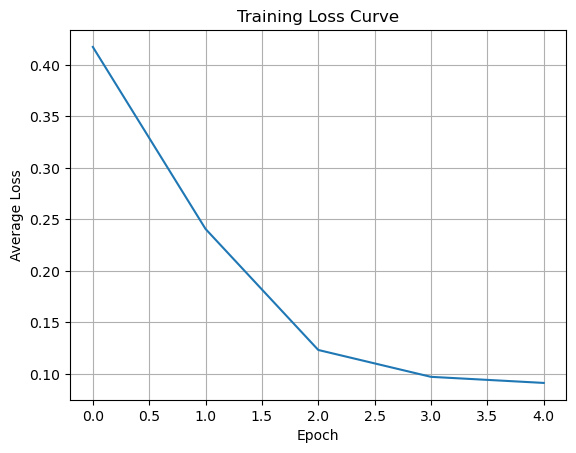

In [1]:
# Old code where paramaters were not updated once per epoch

import torch
import torch.nn as nn
import torch.optim as optim
import pickle as pkl
import matplotlib.pyplot as plt

# Load test params
file_path = r'C:\Users\CooperO\SYDE577\assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

inputs = torch.tensor(data['inputs'], dtype=torch.float32)
targets = torch.tensor(data['targets'], dtype=torch.float32)

# Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)  
        self.relu = nn.ReLU()
        
        self.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float32))
        self.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float32))
        self.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float32))
        self.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float32))
        self.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float32))
        self.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float32))
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNet()

# MSE loss
criterion = nn.MSELoss()

# Custom MSE implementation (cannot be called like criterion it will be different)
def get_loss(y, y_hat):
    return 0.5 * ((y_hat - y) ** 2).mean()

# Gradient descent optimizer; learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 5
loss_vals = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for i in range(len(inputs)):
        # print(inputs.shape, targets.shape)
        input_data = inputs[i]
        target_data = targets[i]

        # Forward pass
        output = model(input_data)
        loss = get_loss(output, target_data)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_loss = epoch_loss / len(inputs)
    loss_vals.append(avg_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

# Plot the loss curve
plt.plot(range(epochs), loss_vals)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

C:\Users\CooperO\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/5, Loss: 0.5380007999139312
Epoch 2/5, Loss: 0.4851548937854557
Epoch 3/5, Loss: 0.45430783553180604
Epoch 4/5, Loss: 0.43227856711683266
Epoch 5/5, Loss: 0.41422110982994303


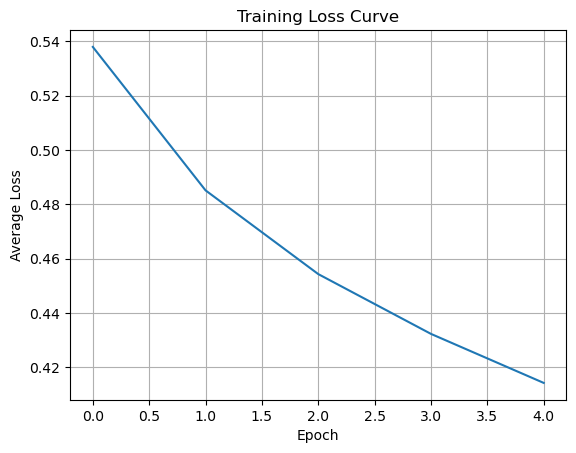

In [2]:
# New code where paramaters ARE updated once per epoch but lr needs to be reduced
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load test params
file_path = r'C:\Users\CooperO\SYDE577\assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

inputs = torch.tensor(data['inputs'], dtype=torch.float64)
targets = torch.tensor(data['targets'], dtype=torch.float64)

# Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10, dtype=torch.float64)
        self.fc2 = nn.Linear(10, 10, dtype=torch.float64)
        self.fc3 = nn.Linear(10, 1, dtype=torch.float64)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNet()

# Initialize weights and biases
model.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float64))
model.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float64))
model.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float64))
model.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float64))
model.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float64))
model.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float64))

# MSE loss
criterion = nn.MSELoss()

# Custom MSE implementation (MSE/2)
def get_loss(y, y_hat):
    return 0.5 * ((y_hat - y) ** 2).mean()

# Optimizer with learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.001)
                
# Training loop
epochs = 5
loss_vals = []

for epoch in range(epochs):
    optimizer.zero_grad()
    epoch_loss = 0.0
    
    for i in range(len(inputs)):
        input_data = inputs[i]
        target_data = targets[i]

        # Forward pass
        output = model(input_data)
        loss = criterion(output, target_data)/2
        epoch_loss += loss.item()
        
        # Accumulate gradients
        loss.backward()

    # Perform a single parameter update after accumulating gradients
    optimizer.step()
    
    # Average loss for the epoch
    avg_loss = epoch_loss / len(inputs)
    loss_vals.append(avg_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

# Plot the loss curve
plt.plot(range(epochs), loss_vals)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

Epoch 1/5, Loss: 0.5380007999139312
Epoch 2/5, Loss: 0.4851548937854557
Epoch 3/5, Loss: 0.45430783553180604
Epoch 4/5, Loss: 0.43227856711683266
Epoch 5/5, Loss: 0.41422110982994303


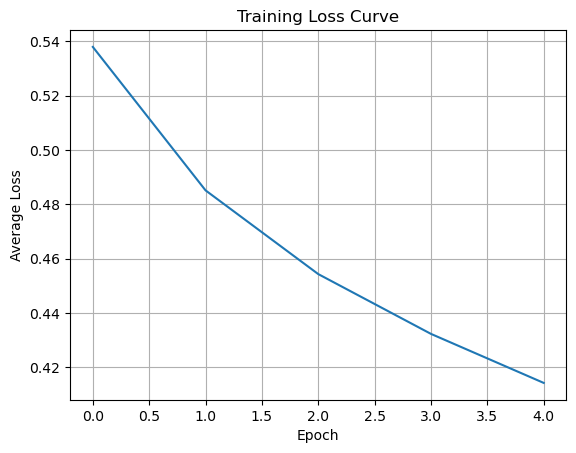

In [3]:
# New code where paramaters ARE updated once per epoch with manual implementation of optimizer.step
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load test params
file_path = r'C:\Users\CooperO\SYDE577\assignment-one-test-parameters.pkl'

with open(file_path, 'rb') as file:
    data = pkl.load(file)

inputs = torch.tensor(data['inputs'], dtype=torch.float64)
targets = torch.tensor(data['targets'], dtype=torch.float64)

# Define model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 10, dtype=torch.float64)
        self.fc2 = nn.Linear(10, 10, dtype=torch.float64)
        self.fc3 = nn.Linear(10, 1, dtype=torch.float64)
        self.relu = nn.ReLU()
        
        self.fc1.weight = nn.Parameter(torch.tensor(data['w1'], dtype=torch.float64))
        self.fc1.bias = nn.Parameter(torch.tensor(data['b1'], dtype=torch.float64))
        self.fc2.weight = nn.Parameter(torch.tensor(data['w2'], dtype=torch.float64))
        self.fc2.bias = nn.Parameter(torch.tensor(data['b2'], dtype=torch.float64))
        self.fc3.weight = nn.Parameter(torch.tensor(data['w3'], dtype=torch.float64))
        self.fc3.bias = nn.Parameter(torch.tensor(data['b3'], dtype=torch.float64))

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = SimpleNet()

# MSE loss
criterion = nn.MSELoss()

# Custom MSE implementation (MSE/2)
def get_loss(y, y_hat):
    return 0.5 * ((y_hat - y) ** 2).mean()
                
# Training loop
epochs = 5
loss_vals = []
lr = 0.01/10

for epoch in range(epochs):
    model.zero_grad()
    epoch_loss = 0.0
    
    for i in range(len(inputs)):
        input_data = inputs[i]
        target_data = targets[i]

        # Forward pass
        output = model(input_data)
        loss = criterion(output, target_data)/2
        epoch_loss += loss.item()
        
        # Accumulate gradients
        loss.backward()

    # Perform a single parameter update after accumulating gradients (perform manual optimizer.step)
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    
    # Average loss for the epoch
    avg_loss = epoch_loss / len(inputs)
    loss_vals.append(avg_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

# Plot the loss curve
plt.plot(range(epochs), loss_vals)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

In [4]:
model = SimpleNet()
example_in = torch.tensor([[3, 4]], dtype=torch.float64)
example_out = model(example_in)
print(example_out)

tensor([[-0.7561]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
